In [1]:
import pandas as pd

In [2]:
df = pd.read_json("s3a://udacity-dsnd/sparkify/mini_sparkify_event_data.json", lines=True)

In [3]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Martha Tilston,Rockpools,277.89016
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Five Iron Frenzy,Canada,236.09424
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771


In [4]:
df["length"].isna().sum()

58392

In [11]:
time_bw_songs = df[(df["page"] == "NextSong") & (df["userId"] == '30')].sort_values("ts")["ts"].diff() / 1000

In [16]:
listening_data = pd.concat([
    time_bw_songs.shift(-1), 
    df[(df["page"] == "NextSong") & (df["userId"] == '30')].sort_values("ts")["length"]], 
axis=1)

In [24]:
import math

In [26]:
listening_data

,ts,length
0,277.0,277.89016
2,282.0,282.82730
4,223.0,223.60771
7,185.0,185.44281
9,134.0,134.47791
...,...,...
213657,360.0,360.82893
213669,303.0,303.38567
213674,236.0,236.45995
213679,239.0,239.30730


In [32]:
whole_song = listening_data.apply(lambda x: math.isclose(x["ts"], math.floor(x["length"])), axis=1)

In [58]:
df.groupby("userId")["length"].sum()

userId
               0.00000
10        166866.37251
100       672877.85659
100001     35073.74215
100002     49559.91810
              ...     
95        427135.54534
96        452492.37829
97        491231.49635
98        611701.97747
99        127877.88359
Name: length, Length: 226, dtype: float64

In [54]:
listening_data.loc[170:20000]

,ts,length
172,265.0,265.71710
179,168.0,168.98567
185,449090.0,268.38159
16157,137610.0,164.70159


In [34]:
listening_data[~whole_song]

,ts,length
185,449090.0,268.38159
16157,137610.0,164.70159
21051,150.0,101.61587
22475,149695.0,241.34485
29795,115755.0,933.43302
36542,14719.0,254.85016
37378,314188.0,220.13342
47067,233.0,219.34975
47125,638258.0,396.66893
76235,274865.0,227.39546


In [144]:
df.columns

Index(['ts', 'userId', 'sessionId', 'page', 'auth', 'method', 'status',
       'level', 'itemInSession', 'location', 'userAgent', 'lastName',
       'firstName', 'registration', 'gender', 'artist', 'song', 'length'],
      dtype='object')

## Exploration

In [145]:
df["userId"].nunique()

226

Filter out users who are not logged in. We only care about churn so we focus our analysis on users that already have an account

In [146]:
df = df[df["userId"] != ""]

In [147]:
df["status"].unique()

array([200, 307, 404])

In [148]:
df[["page", "status"]].drop_duplicates()

,page,status
0,NextSong,200
8,Add to Playlist,200
11,Roll Advert,200
14,Thumbs Up,307
35,Downgrade,200
47,Thumbs Down,307
51,Home,200
53,Logout,307
139,Help,200
144,Upgrade,200


In [149]:
df["method"].unique()

array(['PUT', 'GET'], dtype=object)

In [150]:
df[["page", "status", "method"]].drop_duplicates()

,page,status,method
0,NextSong,200,PUT
8,Add to Playlist,200,PUT
11,Roll Advert,200,GET
14,Thumbs Up,307,PUT
35,Downgrade,200,GET
47,Thumbs Down,307,PUT
51,Home,200,GET
53,Logout,307,PUT
139,Help,200,GET
144,Upgrade,200,GET


Pretty much all information is captured in the page column itself (IE each page only has one combination of status codes and methods).

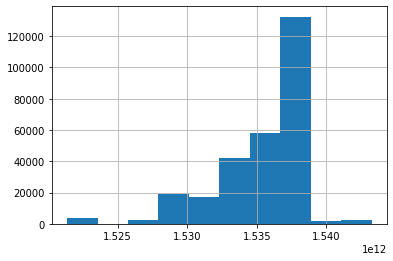

In [151]:
df["registration"].hist();

Detecting mobile or desktop based on user agent:

https://developer.mozilla.org/en-US/docs/Web/HTTP/Browser_detection_using_the_user_agent#mobile_tablet_or_desktop

In [152]:
df["userAgent"].str.contains("Mobi").value_counts()

False    255581
True      22573
Name: userAgent, dtype: int64

In [153]:
df["isMobile"] = df["userAgent"].str.contains("Mobi")

In [154]:
df.groupby("userId")["isMobile"].mean().unique()

array([0., 1.])

Users either spend all their time on mobile or on desktop. We can use this as a feature for each user.

Let's take a look at the location column

In [155]:
df["location"].nunique()

114

There are a lot of different values so let's take a look at how they're formatted so we can maybe clean the column up a little bit.

In [156]:
df["location"].unique()[:10]

array(['Bakersfield, CA', 'Boston-Cambridge-Newton, MA-NH',
       'Tallahassee, FL', 'Spokane-Spokane Valley, WA',
       'Baltimore-Columbia-Towson, MD', 'Denver-Aurora-Lakewood, CO',
       'McAllen-Edinburg-Mission, TX', 'Columbus, GA-AL',
       'Phoenix-Mesa-Scottsdale, AZ',
       'Tampa-St. Petersburg-Clearwater, FL'], dtype=object)

Let's just take the first state in the list and use that as the location for our users.

In [157]:
df["stateCode"] = df["location"].str.split(", ").map(lambda x: x[1].split("-")[0])

In [158]:
import matplotlib.pyplot as plt

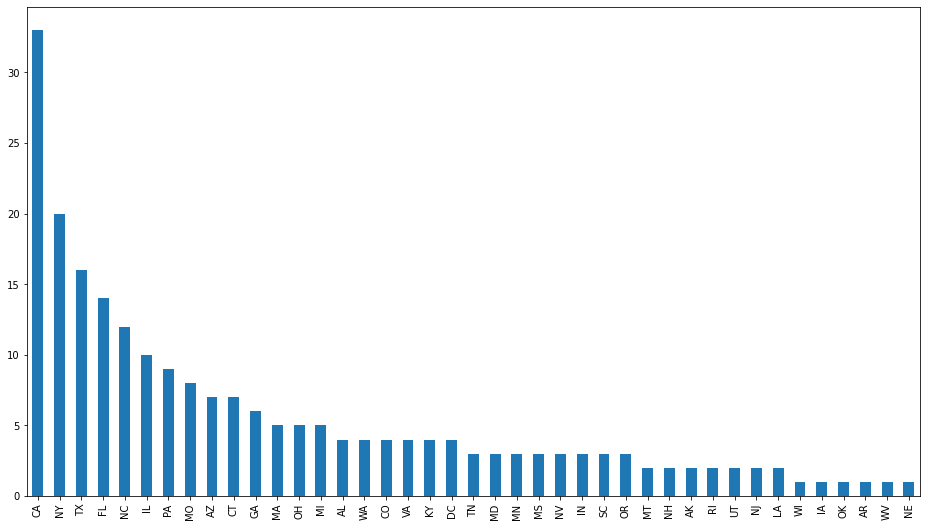

In [159]:
plt.figure(figsize=(16,9))
df.groupby("userId")["stateCode"].unique().map(lambda x: x[0]).value_counts().plot(kind="bar");

This is a categorical variable with relatively high cardinality. It would need to be one-hot-encoded which would then add up to 50 columns to our dataset. This should start to make us worry about the curse of dimensionality. If we include too many columns with so few observations, we end up "misleading" the model since it's not able to differentiate any signal from the noise.

In [160]:
df["level"].unique()

array(['paid', 'free'], dtype=object)

We can easily binary encode this column, but the value can change over time so we should use the value from the user's latest interaction with the platform.

In [161]:
paid_user = df.sort_values("ts").groupby("userId")["level"].last().map({"free": 0, "paid": 1})

If the user has visited the Cancellation Confirmation page, they have left the platform

In [162]:
churned = df.groupby("userId")["page"].unique() \
    .map(lambda x: 1 if "Cancellation Confirmation" in x else 0)

In [163]:
sessions_per_user = df.groupby("userId")["sessionId"].nunique()

In [164]:
session_len = df.groupby(['userId', "sessionId"]).agg({"ts": ['min', 'max']})

In [165]:
session_len["length"] = session_len[('ts', 'max')] - session_len[('ts', 'min')]

In [166]:
session_len

ts                   length
                            min            max          
userId sessionId                                        
10     9          1538965220000  1538979372000  14152000
       595        1539833923000  1539926798000  92875000
       1047       1540850546000  1540856031000   5485000
       1414       1541255262000  1541270598000  15336000
       1592       1542310466000  1542327989000  17523000
...                         ...            ...       ...
99     1683       1542376407000  1542389629000  13222000
       2011       1542585085000  1542590831000   5746000
       2062       1542900850000  1542918384000  17534000
       2201       1543067431000  1543095650000  28219000
       2274       1543275474000  1543303277000  27803000

[3176 rows x 3 columns]

In [167]:
import seaborn as sns

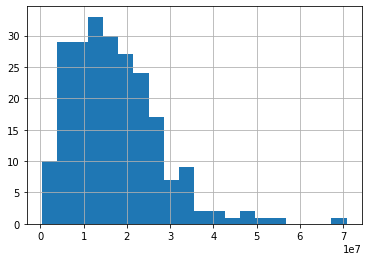

In [168]:
session_len.groupby("userId")["length"].mean().hist(bins=20);

In [169]:
avg_session_len_per_user = session_len.groupby("userId")["length"].mean()

In [170]:
avg_session_len_per_user

userId
10        2.758483e+07
100       1.899114e+07
100001    8.889500e+06
100002    1.207100e+07
100003    5.947000e+06
              ...     
95        1.269688e+07
96        2.354216e+07
97        1.609980e+07
98        2.223082e+07
99        1.142982e+07
Name: length, Length: 225, dtype: float64

In [171]:
churned_len = pd.concat([churned, avg_session_len_per_user], axis=1)
churned_len.columns = ["Churned", "Session Length"]

In [172]:
import matplotlib.pyplot as plt

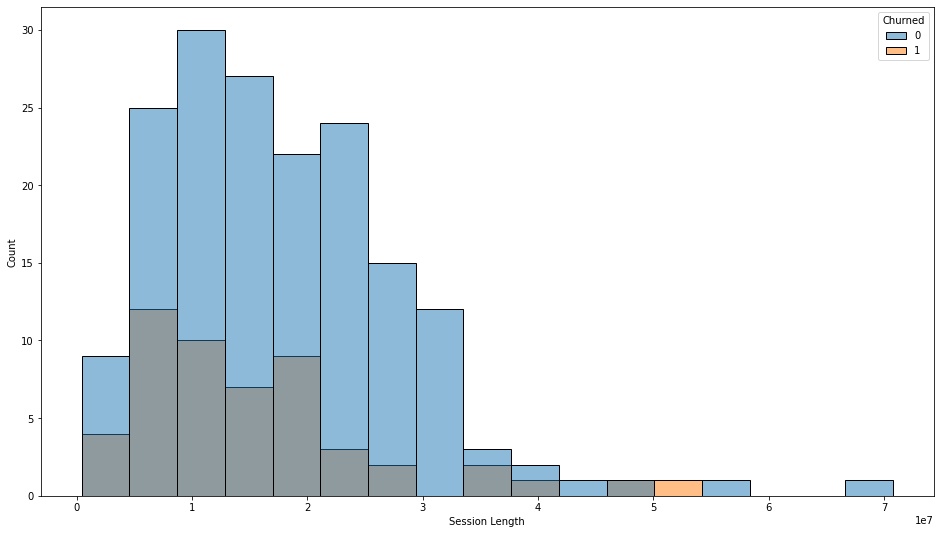

In [173]:
plt.figure(figsize=(16,9))
sns.histplot(churned_len, x="Session Length", hue="Churned");

There is no clear difference in session time between churned and not churned users.

In [174]:
session_ends = df.sort_values("ts").groupby(["userId", "sessionId"])[["ts", "itemInSession"]].last()

In [175]:
session_ends

ts  itemInSession
userId sessionId                              
10     9          1538979372000             71
       595        1539926798000            456
       1047       1540856031000             24
       1414       1541270598000             81
       1592       1542327989000             83
...                         ...            ...
99     1683       1542389629000             55
       2011       1542590831000             23
       2062       1542918384000             91
       2201       1543095650000            148
       2274       1543303277000            136

[3176 rows x 2 columns]

In [176]:
avg_time_bw_sessions = session_ends.sort_values('ts').groupby("userId")['ts'].agg(lambda x: x.diff().mean())

In [177]:
avg_time_bw_sessions[:10]

userId
10        7.304832e+08
100       1.487741e+08
100001    3.737400e+07
100002    1.586523e+09
100003    1.741680e+08
100004    2.459878e+08
100005    3.888878e+08
100006             NaN
100007    6.250461e+08
100008    8.457060e+08
Name: ts, dtype: float64

In [178]:
avg_time_bw_sessions.mean()

487043744.5645679

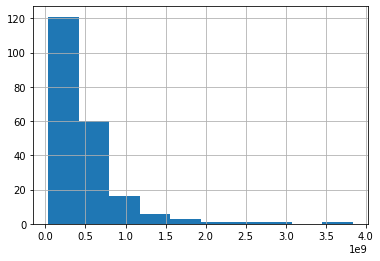

In [179]:
avg_time_bw_sessions.hist();

In [180]:
avg_time_bw_sessions.isna().sum()

15

In [181]:
df["page"].unique()

array(['NextSong', 'Add to Playlist', 'Roll Advert', 'Thumbs Up',
       'Downgrade', 'Thumbs Down', 'Home', 'Logout', 'Help', 'Upgrade',
       'Add Friend', 'Settings', 'Submit Upgrade', 'About',
       'Submit Downgrade', 'Error', 'Save Settings', 'Cancel',
       'Cancellation Confirmation'], dtype=object)

In [182]:
df["auth"].unique()

array(['Logged In', 'Cancelled'], dtype=object)

In [183]:
df[df["page"] == "Cancellation Confirmation"]

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length,isMobile,stateCode
20231,1538943990000,18,514,Cancellation Confirmation,Cancelled,GET,200,paid,104,"Kansas City, MO-KS","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Mendoza,Adriel,1.535623e+12,M,NaN,NaN,NaN,False,MO
23811,1539033046000,32,540,Cancellation Confirmation,Cancelled,GET,200,paid,56,"Phoenix-Mesa-Scottsdale, AZ","""Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like...",Mckee,Diego,1.537168e+12,M,NaN,NaN,NaN,True,AZ
37817,1539318918000,125,174,Cancellation Confirmation,Cancelled,GET,200,free,10,"Corpus Christi, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Hart,Mason,1.533157e+12,M,NaN,NaN,NaN,False,TX
40356,1539375441000,105,508,Cancellation Confirmation,Cancelled,GET,200,paid,332,"Indianapolis-Carmel-Anderson, IN",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Garcia,Alexander,1.536817e+12,M,NaN,NaN,NaN,False,IN
42009,1539465584000,17,797,Cancellation Confirmation,Cancelled,GET,200,paid,273,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:24.0) G...,Johnson,Kayla,1.538334e+12,F,NaN,NaN,NaN,False,PA
44616,1539588854000,143,843,Cancellation Confirmation,Cancelled,GET,200,free,29,"Virginia Beach-Norfolk-Newport News, VA-NC","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Harrison,Molly,1.534255e+12,F,NaN,NaN,NaN,False,VA
52748,1539729037000,101,842,Cancellation Confirmation,Cancelled,GET,200,paid,145,"Denver-Aurora-Lakewood, CO",Mozilla/5.0 (Windows NT 6.2; WOW64; rv:31.0) G...,Hogan,Alex,1.535066e+12,M,NaN,NaN,NaN,False,CO
53205,1539736161000,129,802,Cancellation Confirmation,Cancelled,GET,200,paid,34,"Flint, MI","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",Wang,Davis,1.538290e+12,M,NaN,NaN,NaN,False,MI
54476,1539759749000,121,881,Cancellation Confirmation,Cancelled,GET,200,paid,287,"Oxnard-Thousand Oaks-Ventura, CA",Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:31....,Olsen,Nikolas,1.528404e+12,M,NaN,NaN,NaN,False,CA
54619,1539761972000,51,934,Cancellation Confirmation,Cancelled,GET,200,paid,176,"Lexington-Fayette, KY","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Johnson,Ethan,1.538081e+12,M,NaN,NaN,NaN,False,KY


## Create main dataframe

In [184]:
user_info = pd.DataFrame({"avg_time_bw_sessions": avg_time_bw_sessions})

In [185]:
user_info["avg_session_length"] = avg_session_len_per_user

In [186]:
user_info.head()

,avg_time_bw_sessions,avg_session_length
userId,,
10,7.304832e+08,2.758483e+07
100,1.487741e+08,1.899114e+07
100001,3.737400e+07,8.889500e+06
100002,1.586523e+09,1.207100e+07
100003,1.741680e+08,5.947000e+06


In [187]:
user_info.isna().sum()

avg_time_bw_sessions    15
avg_session_length       0
dtype: int64

In [188]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer()
user_info["avg_time_bw_sessions"] = impute.fit_transform(user_info[["avg_time_bw_sessions"]])

Check format of ts, looks to be in milliseconds since epoch

In [189]:
df["ts"].iloc[0]

1538352117000

In [190]:
def daysOnPlatform(x):
    return max(1, round((x["ts"] - x["registration"]) / 3600 / 24 / 1000, 2))

days_on_platform = df.groupby("userId").last().apply(daysOnPlatform, axis=1)

In [191]:
user_info["days_on_platform"] = days_on_platform

In [192]:
user_info.isna().sum()

avg_time_bw_sessions    0
avg_session_length      0
days_on_platform        0
dtype: int64

In [193]:
user_info["total_pages"] = df.groupby("userId")['ts'].count()

In [194]:
user_info.isna().sum()

avg_time_bw_sessions    0
avg_session_length      0
days_on_platform        0
total_pages             0
dtype: int64

In [195]:
user_info["pages_per_day"] = user_info.apply(lambda x: x["total_pages"] / x["days_on_platform"], axis=1)

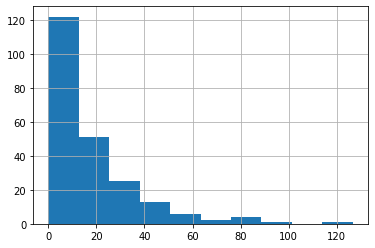

In [196]:
user_info["pages_per_day"].hist();

In [197]:
user_info.isna().sum()

avg_time_bw_sessions    0
avg_session_length      0
days_on_platform        0
total_pages             0
pages_per_day           0
dtype: int64

In [198]:
page_visits = df.groupby("userId")["page"].value_counts().unstack()

In [199]:
page_visits = page_visits.fillna(0)

In [200]:
page_visits = df.groupby("userId")["page"].value_counts().unstack()
page_visits = page_visits.fillna(0)
page_visits.head()

page,About,Add Friend,Add to Playlist,Cancel,Cancellation Confirmation,Downgrade,Error,Help,Home,Logout,NextSong,Roll Advert,Save Settings,Settings,Submit Downgrade,Submit Upgrade,Thumbs Down,Thumbs Up,Upgrade
userId,,,,,,,,,,,,,,,,,,,
10,2.0,12.0,9.0,0.0,0.0,7.0,0.0,1.0,30.0,11.0,673.0,1.0,1.0,7.0,0.0,0.0,4.0,37.0,0.0
100,12.0,49.0,61.0,0.0,0.0,30.0,3.0,18.0,105.0,35.0,2682.0,25.0,5.0,11.0,1.0,1.0,27.0,148.0,1.0
100001,0.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,11.0,7.0,133.0,14.0,0.0,1.0,0.0,0.0,2.0,8.0,2.0
100002,0.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,195.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
100003,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,7.0,3.0,51.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


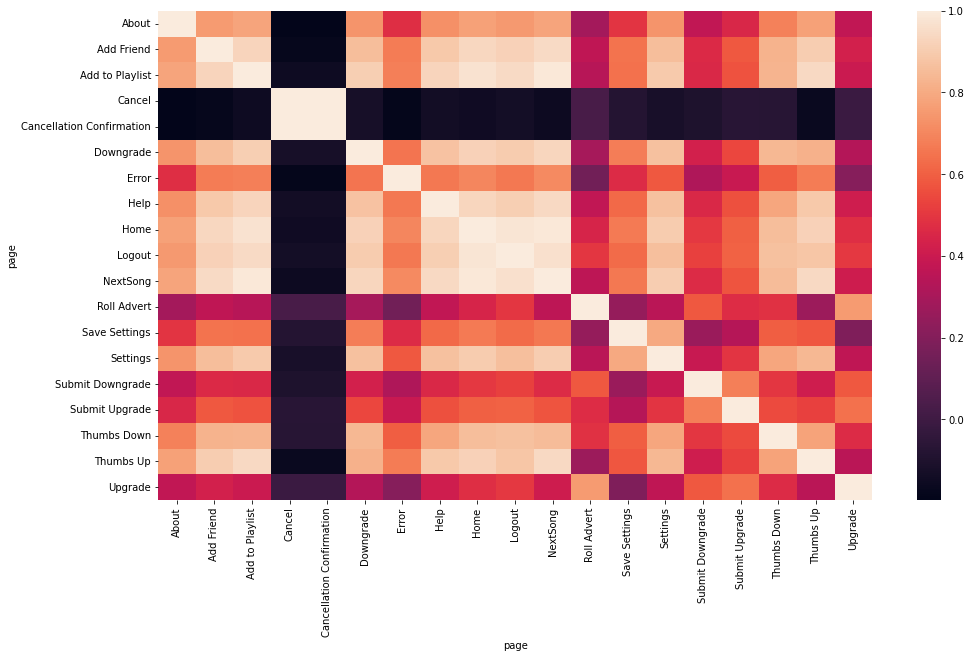

In [201]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(page_visits.corr());

In [202]:
user_info.index

Index(['10', '100', '100001', '100002', '100003', '100004', '100005', '100006',
       '100007', '100008',
       ...
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', name='userId', length=225)

In [203]:
user_info = user_info.merge(page_visits, on="userId")

In [204]:
user_info.shape

(225, 24)

In [205]:
user_info.isna().sum()

avg_time_bw_sessions         0
avg_session_length           0
days_on_platform             0
total_pages                  0
pages_per_day                0
About                        0
Add Friend                   0
Add to Playlist              0
Cancel                       0
Cancellation Confirmation    0
Downgrade                    0
Error                        0
Help                         0
Home                         0
Logout                       0
NextSong                     0
Roll Advert                  0
Save Settings                0
Settings                     0
Submit Downgrade             0
Submit Upgrade               0
Thumbs Down                  0
Thumbs Up                    0
Upgrade                      0
dtype: int64

In [206]:
items_per_session = df.groupby(["userId", "sessionId"])["itemInSession"].max().groupby("userId").mean();

In [207]:
user_info = user_info.merge(items_per_session, on="userId")

<AxesSubplot:>

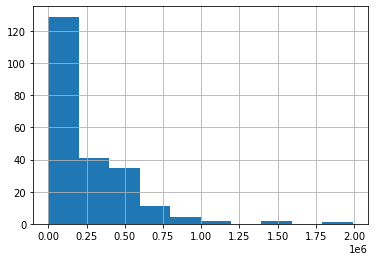

In [208]:
listening_to_music = df.groupby("userId")["length"].sum()
listening_to_music.hist()

In [209]:
user_info = user_info.merge(listening_to_music, on="userId")

In [210]:
user_info.head()

,avg_time_bw_sessions,avg_session_length,days_on_platform,total_pages,pages_per_day,About,Add Friend,Add to Playlist,Cancel,Cancellation Confirmation,...,Roll Advert,Save Settings,Settings,Submit Downgrade,Submit Upgrade,Thumbs Down,Thumbs Up,Upgrade,itemInSession,length
userId,,,,,,,,,,,,,,,,,,,,,
10,7.304832e+08,2.758483e+07,51.76,795,15.359351,2.0,12.0,9.0,0.0,0.0,...,1.0,1.0,7.0,0.0,0.0,4.0,37.0,0.0,135.500000,166866.37251
100,1.487741e+08,1.899114e+07,64.87,3214,49.545244,12.0,49.0,61.0,0.0,0.0,...,25.0,5.0,11.0,1.0,1.0,27.0,148.0,1.0,93.228571,672877.85659
100001,3.737400e+07,8.889500e+06,44.80,187,4.174107,0.0,2.0,3.0,1.0,1.0,...,14.0,0.0,1.0,0.0,0.0,2.0,8.0,2.0,49.250000,35073.74215
100002,1.586523e+09,1.207100e+07,160.47,218,1.358509,0.0,1.0,5.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,54.000000,49559.91810
100003,1.741680e+08,5.947000e+06,22.75,78,3.428571,0.0,0.0,2.0,1.0,1.0,...,9.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,41.000000,12306.41932


In [211]:
isMobile = df.groupby("userId")["isMobile"].first().astype("int8")

In [212]:
user_info = user_info.merge(isMobile, on="userId")

In [213]:
gender = df.groupby("userId")["gender"].first().map({"M": 0, "F": 1})

In [214]:
user_info = user_info.merge(gender, on="userId")

In [215]:
paid_user = df.sort_values("ts").groupby("userId")["level"].last().map({"free": 0, "paid": 1})
user_info = user_info.merge(paid_user, on="userId")

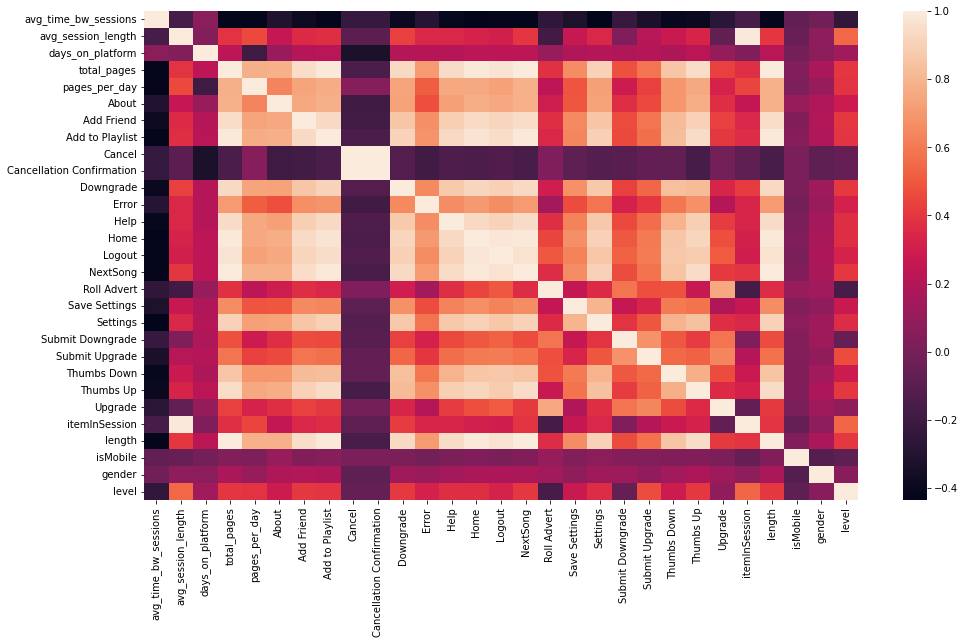

In [216]:
plt.figure(figsize=(16, 9))
sns.heatmap(user_info.corr());

## Modeling

Let's train a baseline LogisticRegression just to see what happens

In [218]:
# Let's make a dictionary to store results of each model
performance = {}

In [220]:
X = user_info.drop(columns=["Cancellation Confirmation", "Cancel"])
y = user_info["Cancellation Confirmation"]

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [223]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [224]:
from sklearn.metrics import classification_report
preds = log_reg.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87        53
         1.0       0.50      0.07      0.12        15

    accuracy                           0.78        68
   macro avg       0.64      0.52      0.50        68
weighted avg       0.72      0.78      0.71        68



In [225]:
from sklearn.metrics import recall_score, accuracy_score
def record_metrics(model, X, y_true):
    preds = model.predict(X)
    recall = recall_score(y_true, preds)
    acc = accuracy_score(y_true, preds)
    return [recall, acc]

In [226]:
performance["log_reg"] = record_metrics(log_reg, X_test, y_test)

Not so great since we have such a small sample size and very low number of churned users in general. Let's try some other modeling approaches.

### RandomForestClassifier

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
forest = RandomForestClassifier(n_estimators=1000, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [229]:
pd.DataFrame(forest.feature_importances_, index=X.columns).sort_values(0, ascending=False)

,0
days_on_platform,0.157525
avg_time_bw_sessions,0.138883
pages_per_day,0.054681
length,0.050482
NextSong,0.046959
Thumbs Up,0.046643
avg_session_length,0.043796
itemInSession,0.040843
total_pages,0.040751
Roll Advert,0.039387


In [230]:
preds = forest.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        53
         1.0       0.67      0.40      0.50        15

    accuracy                           0.82        68
   macro avg       0.76      0.67      0.70        68
weighted avg       0.81      0.82      0.81        68



In [231]:
53/68

0.7794117647058824

We have a slightly better accuracy than just predicting the most common class, but the model is really not doing much. Maybe a gridsearch could get us closer. In the grid search, we will optimize for recall since we want to capture as many users likely to churn as possible.

In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
params = {
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2,4,6]
}

cv = GridSearchCV(RandomForestClassifier(n_estimators=1000), params, cv=3, scoring="recall")

In [234]:
cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=1000),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall')

In [235]:
cv.best_params_

{'max_depth': 10, 'min_samples_split': 4}

In [236]:
threshold = 0.5
preds = cv.best_estimator_.predict_proba(X_test)
print(classification_report(y_test, preds[:, 1] > threshold))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        53
         1.0       0.75      0.40      0.52        15

    accuracy                           0.84        68
   macro avg       0.80      0.68      0.71        68
weighted avg       0.83      0.84      0.82        68



In [237]:
performance["random_forest"] = record_metrics(cv.best_estimator_, X_test, y_test)

Still not great.

### XGBClassifier

In [238]:
import xgboost as xgb
model = xgb.XGBClassifier(n_jobs=2)

In [239]:
params = {
    "max_depth": [2, 5, 20],
    "n_estimators": [50, 100, 200]
}

cv = GridSearchCV(model, params, cv=3, scoring="recall")

cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [240]:
cv.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [241]:
threshold = 0.5
preds = cv.best_estimator_.predict_proba(X_test)
print(classification_report(y_test, preds[:, 1] > threshold))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        53
         1.0       0.73      0.53      0.62        15

    accuracy                           0.85        68
   macro avg       0.80      0.74      0.76        68
weighted avg       0.84      0.85      0.84        68



Getting a bit better slowly. Let's test more values in a random search

In [242]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, norm, randint

params = {
    "max_depth": randint(1, 100),
    "n_estimators": [50, 100, 200]
}

cv = RandomizedSearchCV(model, params, cv=3, scoring="recall", n_iter=50)

cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

In [243]:
cv.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [244]:
threshold = 0.5
preds = cv.best_estimator_.predict_proba(X_test)
print(classification_report(y_test, preds[:, 1] > threshold))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        53
         1.0       0.73      0.53      0.62        15

    accuracy                           0.85        68
   macro avg       0.80      0.74      0.76        68
weighted avg       0.84      0.85      0.84        68



We end up with the same metrics after the grid search

In [245]:
performance["xgboost"] = record_metrics(cv.best_estimator_, X_test, y_test)

In [246]:
pd.DataFrame(cv.best_estimator_.feature_importances_, index=X.columns).sort_values(0, ascending=False)

,0
days_on_platform,0.160699
Home,0.152672
Downgrade,0.126270
pages_per_day,0.067340
About,0.060588
avg_time_bw_sessions,0.060212
Logout,0.045688
Thumbs Down,0.041284
Save Settings,0.039719
Thumbs Up,0.037569


Tree-based models allow us to interpret the feature importance by seeing which features split the data most cleanly. We see that most features have similar importance levels so it's not so easy to define which features are really the most important in this case.

The next few approaches will be highly dependent on scaled data (tree-based models do not need scaled data). We'll do a quick robust scaling to get everything into a similar range of values.

In [247]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
X_train_scaled = r_scaler.fit_transform(X_train)
X_test_scaled = r_scaler.transform(X_test)

### KNeighborsClassifier

In [248]:
from sklearn.neighbors import KNeighborsClassifier

In [249]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [250]:
pred = knn.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89        53
         1.0       0.71      0.33      0.45        15

    accuracy                           0.82        68
   macro avg       0.78      0.65      0.67        68
weighted avg       0.81      0.82      0.80        68



In [251]:
params = {
    "n_neighbors": [2, 5, 10, 20]
}

cv = GridSearchCV(knn, params, cv=3, scoring="recall")

cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 20]}, scoring='recall')

In [252]:
cv.best_params_

{'n_neighbors': 5}

In [253]:
pred = cv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89        53
         1.0       0.71      0.33      0.45        15

    accuracy                           0.82        68
   macro avg       0.78      0.65      0.67        68
weighted avg       0.81      0.82      0.80        68



Worse than our XGBoost.

In [254]:
performance["k_neighbors"] = record_metrics(cv.best_estimator_, X_test_scaled, y_test)

### LinearSVM

In [255]:
from sklearn.svm import SVC

In [256]:
linear_svc = SVC(kernel="linear")

In [257]:
linear_svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [258]:
pred = linear_svc.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        53
         1.0       0.70      0.47      0.56        15

    accuracy                           0.84        68
   macro avg       0.78      0.71      0.73        68
weighted avg       0.83      0.84      0.83        68



Vanilla linear SVM performs worse than our xgboost, let's see if we can gridsearch.

In [259]:
performance["linear_svc_vanilla"] = record_metrics(linear_svc, X_test_scaled, y_test)

In [260]:
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(linear_svc, params, cv=3, scoring="recall")

cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='recall')

In [261]:
cv.best_params_

{'C': 10}

In [262]:
pred = cv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        53
         1.0       0.55      0.73      0.63        15

    accuracy                           0.81        68
   macro avg       0.73      0.78      0.75        68
weighted avg       0.84      0.81      0.82        68



In [263]:
performance["linear_svc_tuned"] = record_metrics(cv.best_estimator_, X_test_scaled, y_test)

We're able to get a much higher recall on the churned class while not sacrificing much accuracy.

### SVM with an RBF kernel

In [264]:
svc = SVC(kernel="rbf")

In [265]:
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    "gamma": ["scale", 0.01, 0.001, 0.1, 1, 10]
}

cv = GridSearchCV(svc, params, cv=3, scoring="recall")

cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000],
                         'gamma': ['scale', 0.01, 0.001, 0.1, 1, 10]},
             scoring='recall')

In [266]:
cv.best_params_

{'C': 100, 'gamma': 0.01}

In [267]:
pred = cv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        53
         1.0       0.50      0.53      0.52        15

    accuracy                           0.78        68
   macro avg       0.68      0.69      0.69        68
weighted avg       0.78      0.78      0.78        68



In [268]:
performance["rbf_svc_1"] = record_metrics(cv.best_estimator_, X_test_scaled, y_test)

Getting up to 0.60 recall while sacrificing some precision. Let's random search around those parameters from above.

In [269]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, norm

params = {
    "C": norm(10000, 1000),
    "gamma": uniform(0.001, 0.015)
}

cv = RandomizedSearchCV(svc, params, cv=3, scoring="recall", n_iter=100)

cv.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35c25a63d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35c25a6b80>},
                   scoring='recall')

In [270]:
pred = cv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80        53
         1.0       0.39      0.60      0.47        15

    accuracy                           0.71        68
   macro avg       0.63      0.67      0.63        68
weighted avg       0.76      0.71      0.72        68



In [271]:
performance["rbf_svc_recall"] = record_metrics(cv.best_estimator_, X_test_scaled, y_test)

In [272]:
cv.best_params_

{'C': 8162.398564208252, 'gamma': 0.006385037635936427}

I'll also try average_precision since it approximates the area under the precision-recall curve and should produce better results with an imbalanced dataset.

In [273]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, norm

params = {
    "C": norm(10000, 1000),
    "gamma": uniform(0.001, 0.015)
}

cv = RandomizedSearchCV(svc, params, cv=3, scoring="average_precision", n_iter=100)

cv.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35d194dd00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35d194d4c0>},
                   scoring='average_precision')

In [274]:
cv.best_params_

{'C': 10562.933546109205, 'gamma': 0.0023445896714157826}

In [275]:
pred = cv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        53
         1.0       0.43      0.60      0.50        15

    accuracy                           0.74        68
   macro avg       0.65      0.69      0.66        68
weighted avg       0.77      0.74      0.75        68



In [276]:
recall_score(y_test, pred)

0.6

In [277]:
performance["rbf_svc_avg_precision"] = record_metrics(cv.best_estimator_, X_test_scaled, y_test)

We end up with a worse recall than in the previous example so let's keep "recall" as our scoring metric to optimize.

In [278]:
#plt.figure(figsize=(16,9))
perf_df = pd.DataFrame(performance)
perf_df = perf_df.T
perf_df.columns = ["recall", "accuracy"]

In [279]:
perf_df

,recall,accuracy
log_reg,0.066667,0.779412
random_forest,0.400000,0.838235
xgboost,0.533333,0.852941
k_neighbors,0.333333,0.823529
linear_svc_vanilla,0.466667,0.838235
linear_svc_tuned,0.733333,0.808824
rbf_svc_1,0.533333,0.779412
rbf_svc_recall,0.600000,0.705882
rbf_svc_avg_precision,0.600000,0.735294


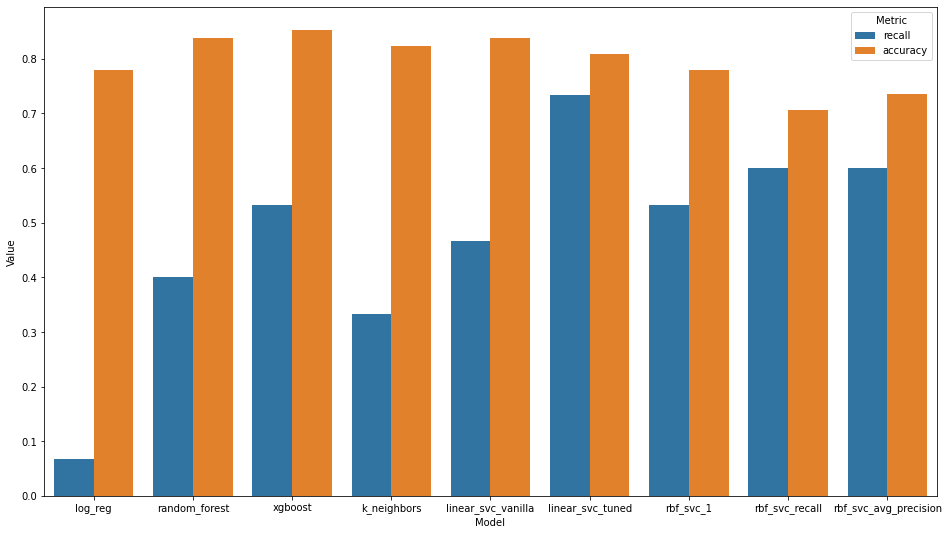

In [280]:
plt.figure(figsize=(16,9))
to_graph = perf_df.stack().to_frame("value").reset_index()
to_graph.columns = ["Model", "Metric", "Value"]
sns.barplot(data=to_graph, hue="Metric", x="Model", y="Value");

The SVM with a linear kernel is the best model for our use case. As I ran this notebook with different train_test splits, the results changed dramatically. We still don't have quite enough data points to properly train the model (there is a large amount of variance between splits) so hopefully results will improve on the full dataset.